# Data Visualization Exercises & Cheat Sheet

1. Complete the code below to import the libraries you need to visualize data

In [ ]:
# Import the libraries that make working with data easy
import pandas as pd
import numpy as np

# import the library that is a 2D plotting library that allows you to create high-quality figures
from matplotlib import pyplot as plt

# import the library that is complimentary to matplotlib and allows further customization of plots
import seaborn as sns

# run the command that allows you to view your plots in the notebook itself as you run the code
%matplotlib inline

2. Import the Titanic dataset.
    
    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment
    * body = recovered body number
    * home dest = anticipated home destination

In [ ]:
titanic = pd.read_excel('/content/titanic.xls')

3. Check the first 3 rows of the Titanic dataset AND output meta data for your dataset

In [ ]:
titanic.head(3)

In [ ]:
titanic.shape

(1309, 14)

4. Create a dataset that includes only the following columns: pclass, survived, sex, age, sibsp, parch, fare, embarked. Using a method of your choosing, handle the missing data in your smaller dataset.

In [ ]:
mini_titanic = titanic[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

mini_titanic.isnull().sum()

,0
pclass,0
survived,0
sex,0
age,263
sibsp,0
parch,0
fare,1
embarked,2


In [ ]:
mini_titanic['embarked'].value_counts()

,count
embarked,
S,916
C,270
Q,123


In [ ]:
mini_titanic['embarked'].mode()[0]

In [ ]:
mini_titanic.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
#replacing the null value within the age column with the average of age
mini_titanic['age'].fillna(mini_titanic['age'].mean(), inplace = True)

# replacing null values with the most common embarked point
mini_titanic['embarked'].fillna(mini_titanic['embarked'].mode(), inplace = True) #1st method
mini_titanic['embarked'].fillna('S', inplace = True) # 2nd method

#replace null values within the fare column with 0
mini_titanic['fare'].fillna(0, inplace = True)


<ipython-input-11-36de8f070dc2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mini_titanic['age'].fillna(mini_titanic['age'].mean(), inplace = True)
<ipython-input-11-36de8f070dc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_titanic['age'].fillna(mini_titanic['age'].mean(), inplace = True)
<ipython-input-11-36de8f070dc2>:4: Future

In [ ]:
mini_titanic.isnull().sum()

,0
pclass,0
survived,0
sex,0
age,0
sibsp,0
parch,0
fare,1
embarked,2


5. Complete the code below to create a <u>detailed scatterplot</u> that charts 'age' and 'fare'. Color the 'scatter' by 'pclass'.

In [ ]:
## Detailed Scatterplot

sns.lmplot (x = 'age' ,
            y = 'fare' ,
            data = mini_titanic ,
            fit_reg = False ,
            hue = 'pclass')

## What information can you take away from this chart?

6. Create a <u>histogram</u> to show the distribution of the "age" column.

In [ ]:
## Histogram for 'age'
# sns.distplot(mini_titanic['age']) #density
sns.displot(mini_titanic['age']) # count

## What age range is the most common among the passengers?

7. Create a series of <u>count plots</u> for the columns: survived, pclass, sex, and embarked

In [ ]:
## Count Plot for 'survived'

sns.countplot(x = 'survived', data = mini_titanic)

## Did more people survive or die during this disaster?
# Unfortunately, more people die

In [ ]:
## Count Plot for 'pclass'

sns.countplot(x = 'pclass', data = mini_titanic)

## Which passenger class had the most passengers? Which had the least?
# Class 3 has the highest and 2 has the lowest

In [ ]:
## Count Plot for 'sex'
sns.countplot(x = 'sex', data = mini_titanic)

## Were there more males or females on the ship?

In [ ]:
## Count Plot for 'embarked'
sns.countplot(x = 'embarked', data = mini_titanic)

## Where did the least amount of passengers get on the ship?

8. Create a new variable called 'family' that is the sum of "sibsp" and "parch". Create a <u>count plot</u> for this new column.

In [ ]:
## Count Plot for 'family'

mini_titanic['family'] = mini_titanic['sibsp'] + mini_titanic['parch']

sns.countplot(x = 'family', data = mini_titanic)

## Do the majority of passengers have family onboard?

# No, most of them are traveling by themselves (not with family members)


9. When you have a variable with two options (i.e. survived/did not survive) you can plot that variable on the "y-axis" to estimate the probability of endorsing that item. Create a <u>barplot</u> that charts 'pclass' and 'survived'. Make sure you have 'survived' on the <b>y-axis</b>!

<ipython-input-37-691ba93ad21e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'pclass',


<Axes: xlabel='pclass', ylabel='survived'>

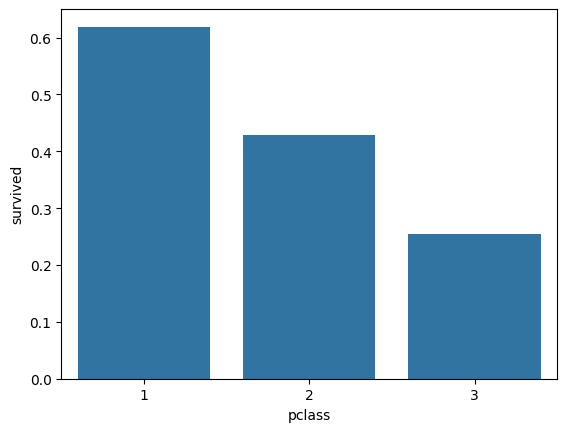

In [ ]:
## Barplot for 'pclass' and 'survived'

sns.barplot(x = 'pclass',
            y = 'survived',
            ci = None, #excluding my convidence interval
            data =  mini_titanic)

## Which passenger class was most likely to survive?
# Class 1


10. Create a <u>barplot</u> that charts 'sex' and 'survived'.

<ipython-input-38-3e589e5c101d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'sex', y = 'survived', ci = None,


<Axes: xlabel='sex', ylabel='survived'>

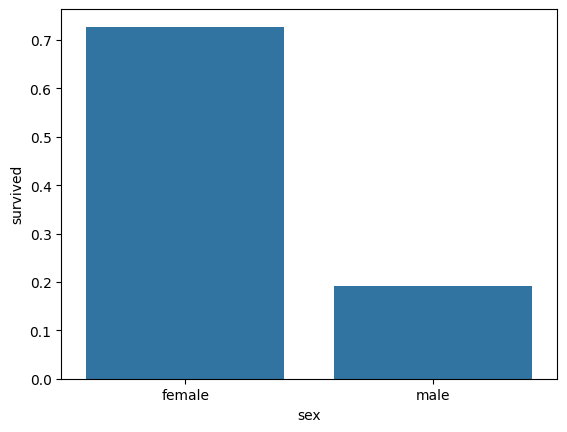

In [ ]:
## Boxplot for 'sex' and 'survived'

sns.barplot(x = 'sex',
            y = 'survived',
            ci = None,
            data = mini_titanic)
## Which gender had a greater probability of surviving?
# Female

11. Create a <u>violin plot</u> that charts 'pclass' and 'age'.

<Axes: xlabel='pclass', ylabel='age'>

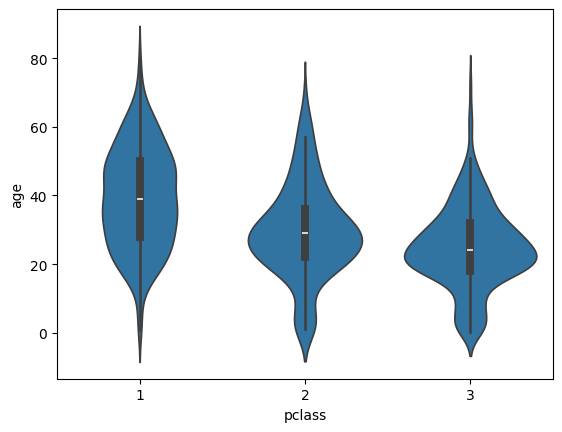

In [ ]:
## Violin plot for 'pclass' and 'age'

sns.violinplot(x = 'pclass',
               y = 'age',
               data = mini_titanic)

## Which class has the largest percentage of younger passengers?
# 3 has the most younger passangers, followed by the 2nd class

## Which class has the oldest passengers?
# 1 has the oldest passengers
